# Tesseract OCR

In [1]:
def levenshtein_distance(s1: str, s2: str) -> int:
    dp = [[0] * (len(s2) + 1) for _ in range(len(s1) + 1)]

    # Fill base row
    for j in range(len(s2) + 1):
        dp[0][j] = j
    # Fill base column
    for i in range(len(s1) + 1):
        dp[i][0] = i

    for i in range(1, len(s1) + 1):
        for j in range(1, len(s2) + 1):
            cost = 0 if s1[i - 1] == s2[j - 1] else 1

            dp[i][j] = min(
                dp[i - 1][j] + 1,        # deletion
                dp[i][j - 1] + 1,        # insertion
                dp[i - 1][j - 1] + cost  # substitution (or no change if cost=0)
            )

    return dp[len(s1)][len(s2)]


### Trying to run tesseract OCR on typed text

C:\Users\user\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


A123



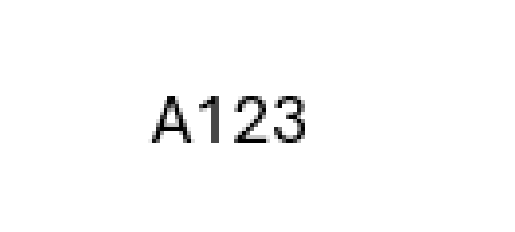

In [2]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

# If needed: Setting the path to the tesseract executable file
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Reading an image
img = cv2.imread(r'C:\Users\user\Desktop\iaa-pictures\aaa.png')


# Running OCR
text = pytesseract.image_to_string(img, lang='eng')  

print(text)




plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [3]:
# The original text and the result, with line breaks replaced by the "|" character.
s1 = "A123"  # הטקסט המקורי
s2 = text.strip().replace(" ", "").replace("\n", "")  # מסירים רווחים וירידות שורה




#   Levenshtein distance
distance = levenshtein_distance(s1, s2)

# Length of the original string
len_s1 = len(s1)


 # Relative performance indicators
cer = distance / len_s1
accuracy = 1 - cer

# Print the results in percentages
print(f"Original text: {s1} (Length:{len_s1})")
print(f"Identification result: {s2}")
print(f"Levenshtein distance {distance}")
print("-" * 20)
print(f"📊 Character Error Rate (CER): {cer:.2%}")
print(f"🎯 Accuracy rate {accuracy:.2%}")

Original text: A123 (Length:4)
Identification result: A123
Levenshtein distance 0
--------------------
📊 Character Error Rate (CER): 0.00%
🎯 Accuracy rate 100.00%


In [4]:
from difflib import SequenceMatcher

# Ground truth
expected = "A123"

# OCR output - the text predicted by the model
ocr_output = text.strip().replace(" ", "")

# Comparison between OCR output and ground truth
matcher = SequenceMatcher(None, expected, ocr_output)
print("Similarity:", matcher.ratio())


Similarity: 1.0


### Running Tesseract OCR without any preprocessing

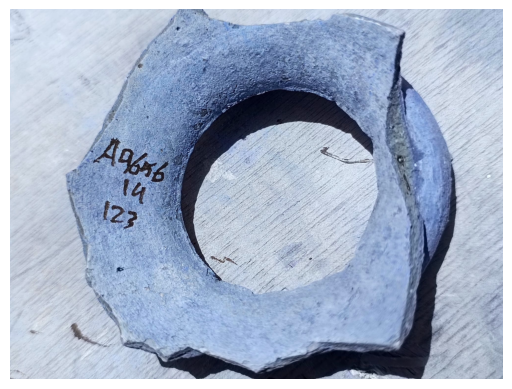

In [5]:




# read image
img = cv2.imread(r'C:\Users\user\Desktop\iaa-pictures\OriginalWhatsApp Image 2025-07-13 at 11.00.52_975f6140.jpg')

#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# run OCR
text = pytesseract.image_to_string(img, lang='eng')  

print(text)




plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [6]:


# Ground truth
expected = """A9656
14
123"""

# OCR output - the text predicted by the model
ocr_output = text.strip().replace(" ", "")

# Comparison between OCR output and ground truthmatcher = SequenceMatcher(None, expected, ocr_output)
print("Similarity:", matcher.ratio())


Similarity: 1.0


In [7]:
# The original text and the OCR result, where line breaks are replaced with '|'


s1 = "A9656|14|123"     # Ground truth
s2  = text.replace("\n", "|").replace(" ", "")  # With a separator character, clean spaces from the OCR output



#  Levenshtein distance
distance = levenshtein_distance(s1, s2)

# Length of the original string
len_s1 = len(s1)


# Relative performance metrics for OCR evaluation
cer = distance / len_s1
accuracy = 1 - cer

# Printing the results as percentages
print(f"Ground truth text: {s1} (Length: {len_s1})")
print(f"OCR prediction: {s2}")
print(f"Levenshtein distance between prediction and ground truth: {distance}")
print("-" * 20)
print(f"📊 Character Error Rate (CER): {cer:.2%}")
print(f"🎯 Accuracy: {accuracy:.2%}")


Ground truth text: A9656|14|123 (Length: 12)
OCR prediction: 
Levenshtein distance between prediction and ground truth: 12
--------------------
📊 Character Error Rate (CER): 100.00%
🎯 Accuracy: 0.00%


In [8]:
# Ground truth
expected = """A9656
14
123"""

# OCR output
ocr_output = text.strip().replace(" ", "")

# Comparison
matcher = SequenceMatcher(None, expected, ocr_output)
print("Similarity ratio:", matcher.ratio())


Similarity ratio: 0.0


### Running Tesseract OCR with image converted to grayscale

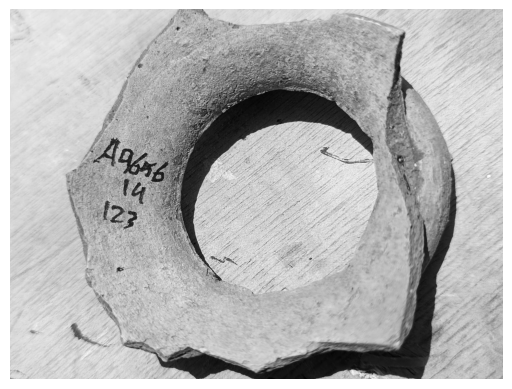

In [9]:
# Convert to grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# run OCR
text = pytesseract.image_to_string(gray, lang='eng')  

print(text)




plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

In [10]:
# The original text and the result, where line breaks are replaced with the '|' character

s1 = "A9656|14|123"      # Ground truth 
s2  = text.replace("\n", "|").replace(" ", "")  #  Clean OCR prediction by removing spaces and using a separator character


#   Levenshtein distance
distance = levenshtein_distance(s1, s2)

#  Length of the original string
len_s1 = len(s1)


# Relative performance metrics
cer = distance / len_s1
accuracy = 1 - cer

# Printing the results as percentages
print(f"Original text: {s1} (Length: {len_s1})")
print(f"OCR result: {s2}")
print(f"Levenshtein distance: {distance}")
print("-" * 20)
print(f"📊 Character Error Rate (CER): {cer:.2%}")
print(f"🎯 Accuracy rate: {accuracy:.2%}")


Original text: A9656|14|123 (Length: 12)
OCR result: 
Levenshtein distance: 12
--------------------
📊 Character Error Rate (CER): 100.00%
🎯 Accuracy rate: 0.00%


In [11]:
# Ground truth
expected = """A9656
14
123"""

# OCR output
ocr_output = text.strip().replace(" ", "")

# Comparison
matcher = SequenceMatcher(None, expected, ocr_output)
print("Similarity ratio:", matcher.ratio())


Similarity ratio: 0.0


### Running Tesseract OCR with Threshold

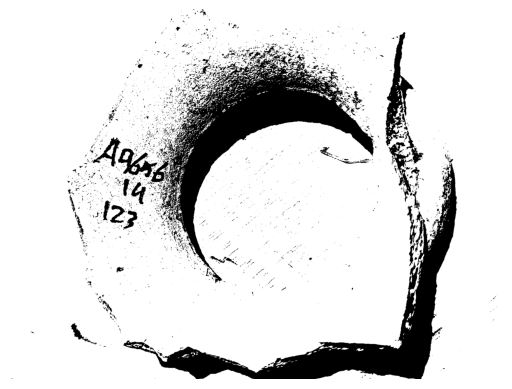

In [12]:
# Threshold
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# run OCR
text = pytesseract.image_to_string(thresh, lang='eng')  

print(text)




plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

In [13]:
# The original text and the result, where line breaks are replaced with the '|' character


s1 = "A9656|14|123"      #Ground truth
s2  = text.replace("\n", "|").replace(" ", "")  # With a separator character, clean spaces from the OCR outputOCR



#   Levenshtein distance
distance = levenshtein_distance(s1, s2)

#  Length of the original string
len_s1 = len(s1)


 # Relative performance metrics
cer = distance / len_s1
accuracy = 1 - cer

# Printing the results as percentages
print(f"Original text: {s1} (Length: {len_s1})")
print(f"OCR result: {s2}")
print(f"Levenshtein distance: {distance}")
print("-" * 20)
print(f"📊 Character Error Rate (CER): {cer:.2%}")
print(f"🎯 Accuracy rate: {accuracy:.2%}")


Original text: A9656|14|123 (Length: 12)
OCR result: 
Levenshtein distance: 12
--------------------
📊 Character Error Rate (CER): 100.00%
🎯 Accuracy rate: 0.00%


In [14]:
# Ground truth
expected = """A9656
14
123"""

# OCR output
ocr_output = text.strip().replace(" ", "")

# Comparison
matcher = SequenceMatcher(None, expected, ocr_output)
print("Similarity ratio:", matcher.ratio())


Similarity ratio: 0.0


### Running Tesseract OCR with sharpening

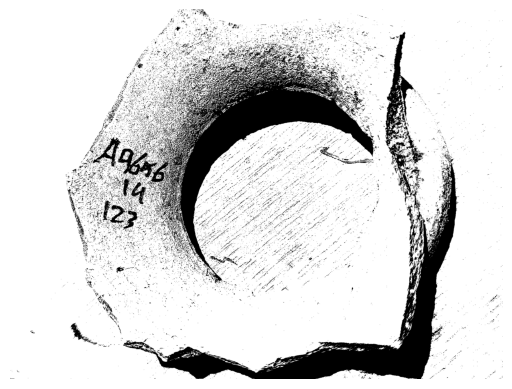

In [15]:
import numpy as np

# Sharpening
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])
sharp = cv2.filter2D(gray, -1, kernel)

# Threshold
_, thresh = cv2.threshold(sharp, 127, 255, cv2.THRESH_BINARY)

# run OCR
text = pytesseract.image_to_string(thresh, lang='eng')  

print(text)




plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

In [16]:
# The original text and the result, where line breaks are replaced with the '|' character

s1 = "A9656|14|123"      #  Ground truth
s2  = text.replace("\n", "|").replace(" ", "")  # With a separator character, clean spaces from the OCR output


#   Levenshtein distance
distance = levenshtein_distance(s1, s2)

#  Length of the original string
len_s1 = len(s1)


# Relative performance metrics
cer = distance / len_s1
accuracy = 1 - cer

# Printing the results as percentages
print(f"Original text: {s1} (Length: {len_s1})")
print(f"OCR result: {s2}")
print(f"Levenshtein distance: {distance}")
print("-" * 20)
print(f"📊 Character Error Rate (CER): {cer:.2%}")
print(f"🎯 Accuracy rate: {accuracy:.2%}")


Original text: A9656|14|123 (Length: 12)
OCR result: 
Levenshtein distance: 12
--------------------
📊 Character Error Rate (CER): 100.00%
🎯 Accuracy rate: 0.00%


In [17]:
# Ground truth
expected = """A9656
14
123"""

# OCR output
ocr_output = text.strip().replace(" ", "")

# Comparison
matcher = SequenceMatcher(None, expected, ocr_output)
print("Similarity ratio:", matcher.ratio())


Similarity ratio: 0.0


### Adding noise removal to the code

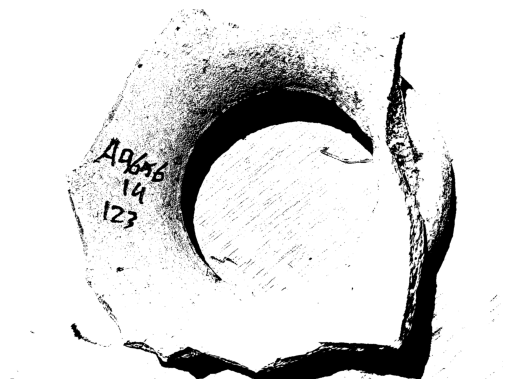

In [18]:
# Sharpening
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])
sharp = cv2.filter2D(gray, -1, kernel)

# Denoising (הוספה שלך)
denoised = cv2.GaussianBlur(sharp, (3,3), 0)

# Threshold
_, thresh = cv2.threshold(denoised, 127, 255, cv2.THRESH_BINARY)

# run OCR
text = pytesseract.image_to_string(thresh, lang='eng')  

print(text)

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()


In [19]:
# The original text and the result, where line breaks are replaced with the '|' character

s1 = "A9656|14|123"      # Ground truth
s2  = text.replace("\n", "|").replace(" ", "")  # With a separator character, clean spaces from the OCR output



#   Levenshtein distance
distance = levenshtein_distance(s1, s2)

#  Length of the original string
len_s1 = len(s1)


# Relative performance metrics
cer = distance / len_s1
accuracy = 1 - cer

# Printing the results as percentages
print(f"Original text: {s1} (Length: {len_s1})")
print(f"OCR result: {s2}")
print(f"Levenshtein distance: {distance}")
print("-" * 20)
print(f"📊 Character Error Rate (CER): {cer:.2%}")
print(f"🎯 Accuracy rate: {accuracy:.2%}")


Original text: A9656|14|123 (Length: 12)
OCR result: 
Levenshtein distance: 12
--------------------
📊 Character Error Rate (CER): 100.00%
🎯 Accuracy rate: 0.00%


### Running Tesseract OCR with  Adaptive Threshold

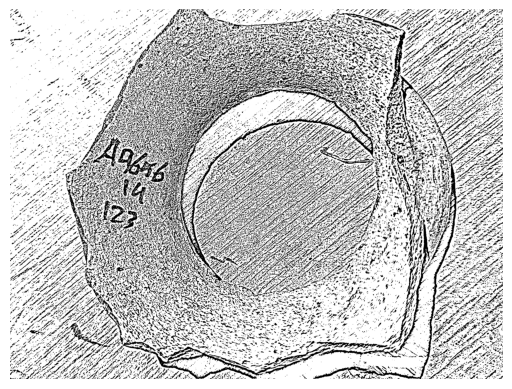

In [20]:
# Sharpening
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])
sharp = cv2.filter2D(gray, -1, kernel)

# Denoising
denoised = cv2.GaussianBlur(sharp, (3,3), 0)

# Adaptive Threshold
thresh = cv2.adaptiveThreshold(denoised, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 31, 7)

# run OCR
text = pytesseract.image_to_string(thresh, lang='eng')  
print(text)

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()


In [22]:
#The original text and the result, where line breaks are replaced with the '|' character

s1 = "A9656|14|123"      # Ground truth
s2  = text.replace("\n", "|").replace(" ", "")  #  With a separator character, clean spaces from the OCR output



#   Levenshtein distance
distance = levenshtein_distance(s1, s2)

# Length of the original string
len_s1 = len(s1)


#Relative performance metrics
cer = distance / len_s1
accuracy = 1 - cer

# Printing the results as percentages
print(f"Original text: {s1} (Length: {len_s1})")
print(f"OCR result: {s2}")
print(f"Levenshtein distance: {distance}")
print("-" * 20)
print(f"📊 Character Error Rate (CER): {cer:.2%}")
print(f"🎯 Accuracy rate: {accuracy:.2%}")


Original text: A9656|14|123 (Length: 12)
OCR result: 
Levenshtein distance: 12
--------------------
📊 Character Error Rate (CER): 100.00%
🎯 Accuracy rate: 0.00%


In [23]:
# Ground truth
expected = """A9656
14
123"""

#OCR output
ocr_output = text.strip().replace(" ", "")

# Comparison
matcher = SequenceMatcher(None, expected, ocr_output)
print("Similarity ratio:", matcher.ratio())


Similarity ratio: 0.0


### Advanced Tesseract parameters

A LL
L
2 LALL
BLL A
B 0 A LL L
B L A LL
7 B
L A 05 B
L 2 L LL A A
7 L 23 7 LL 8 LL
L A 7 L LL A A A A
2 A B A L
LL A AA
2 4 B LL L A A L
A B B B
L B LL 7
5 8
A L L 2
L
LL 3 A A 4 BB BA
A 753 LL 3
A A B
9 1
LL B 1 L A A BL
1 L L 23 A A
LL A 2
LL A 3
LLL B A
7 A A B A L A
A ALA A 5
L LB
4 LL LA



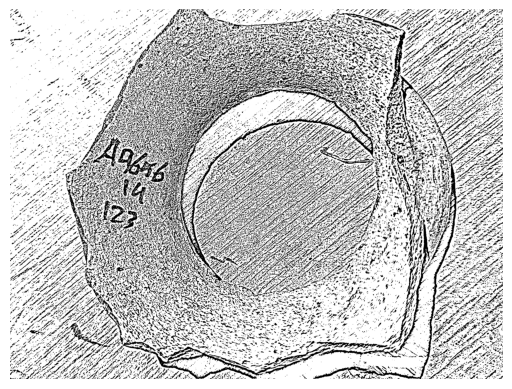

In [24]:

#   whitelist 
# --psm 6 text in several short lines

config = '--psm 6 --oem 1 -c tessedit_char_whitelist=ABL0123456789'

text = pytesseract.image_to_string(thresh, lang='eng', config=config)
print(text)

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

In [25]:
#The original text and the result, where line breaks are replaced with the '|' character

s1 = "A9656|14|123"      # Ground truth
s2  = text.replace("\n", "|").replace(" ", "")  #  With a separator character, clean spaces from the OCR output


#   Levenshtein distance
distance = levenshtein_distance(s1, s2)

#  Length of the original string
len_s1 = len(s1)


# Relative performance metrics
cer = distance / len_s1
accuracy = 1 - cer

# Printing the results as percentages
print(f"Original text: {s1} (Length: {len_s1})")
print(f"OCR result: {s2}")
print(f"Levenshtein distance: {distance}")
print("-" * 20)
print(f"📊 Character Error Rate (CER): {cer:.2%}")
print(f"🎯 Accuracy rate: {accuracy:.2%}")


Original text: A9656|14|123 (Length: 12)
OCR result: ALL|L|2LALL|BLLA|B0ALLL|BLALL|7B|LA05B|L2LLLAA|7L237LL8LL|LA7LLLAAAA|2ABAL|LLAAA|24BLLLAAL|ABBB|LBLL7|58|ALL2|L|LL3AA4BBBA|A753LL3|AAB|91|LLB1LAABL|1LL23AA|LLA2|LLA3|LLLBA|7AABALA|AALAA5|LLB|4LLLA|
Levenshtein distance: 189
--------------------
📊 Character Error Rate (CER): 1575.00%
🎯 Accuracy rate: -1475.00%


In [26]:
# Ground truth
expected = """A9656
14
123"""

# OCR output
ocr_output = text.strip().replace(" ", "")

# Comparison
matcher = SequenceMatcher(None, expected, ocr_output)
print("Similarity ratio:", matcher.ratio())


Similarity ratio: 0.057692307692307696


LAALAA
B L B
L 5A 4
A
7
A



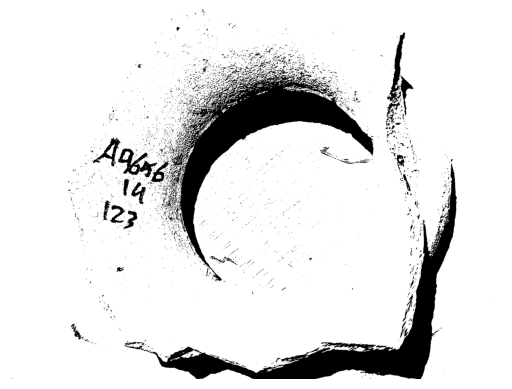

In [28]:




# Threshold 
_, thresh = cv2.threshold(denoised, 100, 255, cv2.THRESH_BINARY)

#   whitelist 
# --psm 6 text in several short lines

config = '--psm 6 --oem 1 -c tessedit_char_whitelist=ABL0123456789'

text = pytesseract.image_to_string(thresh, lang='eng', config=config)
print(text)

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()


In [29]:
#The original text and the result, where line breaks are replaced with the '|' character

s1 = "A9656|14|123"      #Ground truth
s2  = text.replace("\n", "|").replace(" ", "")  #With a separator character, clean spaces from the OCR output



# Levenshtein distance
distance = levenshtein_distance(s1, s2)

# Length of the original string
len_s1 = len(s1)


# Relative performance metrics
cer = distance / len_s1
accuracy = 1 - cer

#Printing the results as percentages
print(f"Original text: {s1} (Length: {len_s1})")
print(f"OCR result: {s2}")
print(f"Levenshtein distance: {distance}")
print("-" * 20)
print(f"📊 Character Error Rate (CER): {cer:.2%}")
print(f"🎯 Accuracy rate: {accuracy:.2%}")


Original text: A9656|14|123 (Length: 12)
OCR result: LAALAA|BLB|L5A4|A|7|A|
Levenshtein distance: 18
--------------------
📊 Character Error Rate (CER): 150.00%
🎯 Accuracy rate: -50.00%


In [30]:
#Ground truth
expected = """A9656
14
123"""

# OCR output
ocr_output = text.strip().replace(" ", "")

# Comparison
matcher = SequenceMatcher(None, expected, ocr_output)
print("Similarity ratio:", matcher.ratio())


Similarity ratio: 0.24242424242424243
